## Heart Disease prediction model
**Problem Statement!**
>to solve the problem of predicting wheather someone have heartDisease or not (0 or 1) (`classification`)

**Data**
> the data used to to train the model is -https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

**Evalution**
> Lets see the result at the end!

**Features**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* The names and social security numbers of the patients were recently removed from the database, replaced with * *  * dummy values.

In [25]:
#libraries Importing

%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
#Model to use
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Evalution model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [26]:
heart_disease = pd.read_csv("./data/heart.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [27]:
heart_disease["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [28]:
pd.crosstab(heart_disease.target, heart_disease.sex)

sex,0,1
target,,
0,86,413
1,226,300


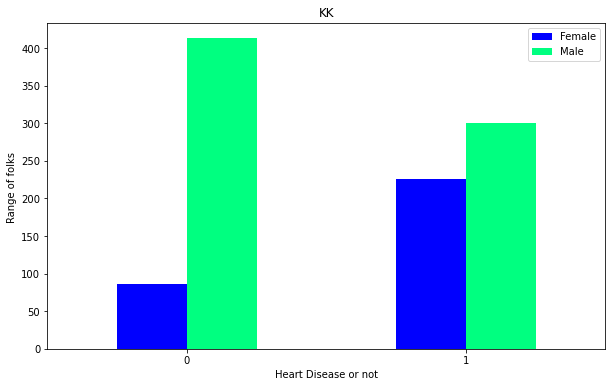

In [29]:
p=pd.crosstab(heart_disease.target,heart_disease.sex).plot(kind="bar",colormap="winter",figsize=(10,6))
plt.title("KK")
# x=plt.xlabel
plt.xlabel("Heart Disease or not")
plt.ylabel("Range of folks ")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.show();

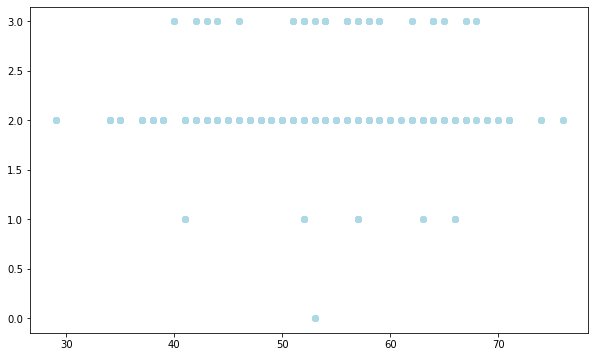

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(heart_disease.age[heart_disease.target==1],heart_disease.thal[heart_disease.target==1],c="lightblue");

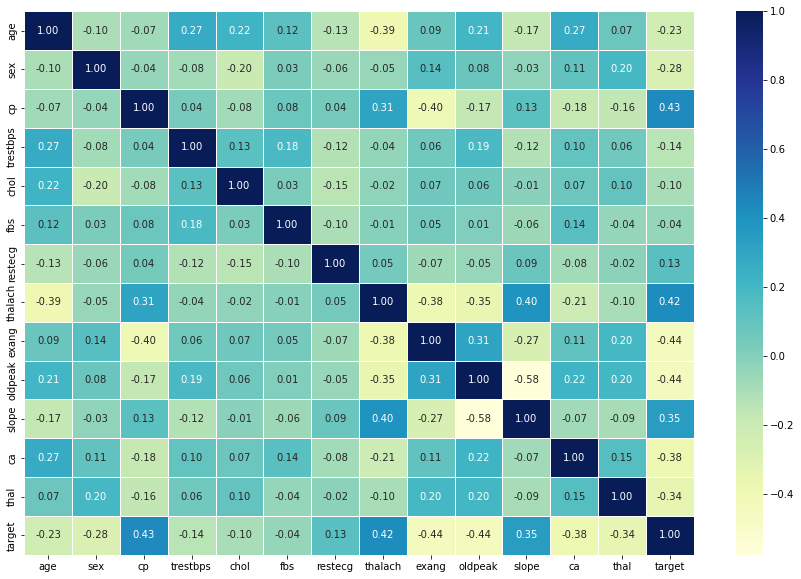

In [40]:
corr_matrix=heart_disease.corr()
fig,ax= plt.subplots(figsize=(15,10))
ax=sn.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");


In [41]:
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((820, 13), (205, 13), (820,), (205,))

In [42]:
model={
    "LogisticRegression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "RandomForest":RandomForestClassifier(),
    "SVC":SVC()
}

In [43]:
def fit_and_score(models,x_train,x_test,y_train,y_test):
    result={}
    np.random.seed(42)
    for model_name, model in models.items():
        model.fit(x_train,y_train)
        result[model_name]=model.score(x_test,y_test)
    return result

In [44]:
fit_and_score(model,x_train,x_test,y_train,y_test)

/home/levi/Desktop/ML/project1/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8048780487804879,
 'KNN': 0.7317073170731707,
 'RandomForest': 0.9853658536585366,
 'SVC': 0.7024390243902439}

In [49]:
ls_grid={
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}
svc_grid={'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
g_search=GridSearchCV(estimator=LogisticRegression(),
                      param_grid=ls_grid,
                      cv=5,verbose=1)

In [50]:
g_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=1)

In [51]:
g_search.best_params_

{'C': 0.03359818286283781, 'solver': 'liblinear'}

In [52]:
g_search.score(x_test,y_test)

0.8097560975609757

In [54]:
r_search=RandomizedSearchCV(estimator=LogisticRegression(),
                      param_distributions=ls_grid,
                      cv=5,verbose=2, n_iter = 20)
r_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [55]:
r_search.best_params_

{'solver': 'liblinear', 'C': 0.03359818286283781}

In [56]:
r_search.score(x_test,y_test)

0.8097560975609757

In [57]:
r_search=RandomizedSearchCV(estimator=SVC(),
                      param_distributions=svc_grid,
                      cv=5,verbose=2, n_iter = 20)
r_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.000

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   verbose=2)

In [58]:
r_search.score(x_test,y_test)

1.0

In [59]:
r_search.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}

In [76]:
y_preds=g_search.predict(x_test)

In [77]:
y_preds

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0])

In [78]:
np.array(y_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0])

/home/levi/Desktop/ML/project1/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


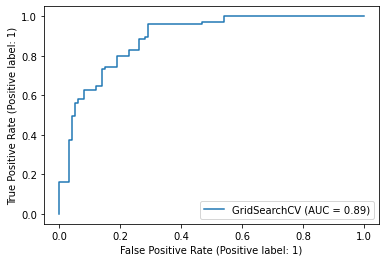

In [79]:
plot_roc_curve(g_search,x_test,y_test);

In [80]:
confusion_matrix(y_preds,y_test)

array([[71, 10],
       [29, 95]])

### Exporting the Model using PICKLE

In [81]:
import pickle

In [82]:
filename = 'finalized_model.pkl'
pickle.dump(r_search, open(filename, 'wb'))